# Project: Investigate a Dataset

## Project Overview

This is the second project of Data Analyst Nanodegree at Udacity. In this project, we'll analyze a dataset and then communicate our findings about it. We will use the Python libraries NumPy, pandas, and Matplotlib to make our analysis easier.

Why this project In this project, we'll go through the data analysis process and see how everything fits together. Later Nanodegree projects will focus on individual pieces of the data analysis process ( like EDA, Data Wrangling and Data Story Telling ).

We'll use the Python libraries NumPy, pandas, and Matplotlib, which make writing data analysis code in Python a lot easier! Not only that, these are sought-after skills by employers!

What I learned Some of the practices I learned from this project are:

Know all the steps involved in a typical data analysis process Be comfortable posing questions that can be answered with a given dataset and then answering those questions Know how to investigate problems in a dataset and wrangle the data into a format you can use Have practice communicating the results of your analysis Be able to use vectorized operations in NumPy and pandas to speed up your data analysis code Be familiar with pandas' Series and DataFrame objects, which let you access your data more conveniently Know how to use Matplotlib to produce plots showing your findings Description This data set is from the list of curated data sets provided by Udacity for this project. (I choose FBI Gun Data (original source on Github))

I posed some questions in the starting of the project and then addressed those questions in my analysis.

I used Pandas, NumPy and matplotlib to generate statistical conclusion throughout my project.

Limitations of this data are also mentioned in the conclusion part.

# TMDb movie data
#[TMDb movie data](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True)
### (cleaned from original data on Kaggle)

# Comments:
### Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
Reponses: These pipe were removed at analysis part (eg. actors = actors.str.split("|"))
## There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
Reponses: Okay.
## The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.
Reponses: I included them for the new analysis
## Don't forget to include your jupyter notebook file so we can test your code dear student 
Reponses: Okay.
## One important thing you have to do is to only comment to document your code, any type of analysis should be included in a markdown cell (just go to a normal cell, click in the menu "Cell", then "Cell Type" and finally select "Markdown")
Reponses: Done.
## Very deep and important questions :trophy: to meet the expectations you have to make an introduction about the dataset at the beginning of your report, describe the event and the variables it contains. Also enumerate the questions so that the reader can easily get an idea of what your project will be. Do not forget to use a markdown cell for this: smile:
Reponses: Done
## Reasoning is provided for each analysis decision, plot, and statistical summary.Not every analysis is followed by an explanation. For example The graphics.Please include one or two sentences talking about what information you can extract from the data. The same applies to the tables you generated. What can we conclude by analyzing these values? Do not forget to use a markdown cell for your analysis (not comments) :smile:
Reponses: Analysis added for each question
## Visualizations made in the project depict the data in an appropriate manner that allows plots to be readily interpreted.
Reponses: Titles and labels added

# Introduction
The primary goal of the project is to go through the dataset and the general data analysis process using numpy, pandas and matplotlib. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
## Research Questions
Q1a. Which factor is most correlated with profit? Which factor is most correlated with revenue?
Q1b. Which fator is most correlated with revenue?
Q2 : What kind of features are associated with movies that have high profit?
Q3 : Does the correlation matrix varies between high profit movies and all movies?
Q4. Casts in the highest profit movies
Q5. Director for most profitable movies
Q6. Gener of most profitable movies
Q7. Profitable movie genre by year
Q8a. which year make the most movie
Q8b. Which year that makes the highest profit ? revenue?
Q9. Which month make the best profit



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

# Date Wrangling
 In this section of the report, I will:
 Load in the data
 Check the columns/catergoris
 Check for cleanliness

In [8]:
import os
print(os. getcwd())
df = pd.read_csv("tmdb-movies.csv")
df.head(4)


C:\Users\Zi Ye


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09


In [9]:
#get info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [10]:
# remove duplicate row
df.drop_duplicates(inplace = True)
#check
df.duplicated().sum()

0

In [11]:
# check duplicates
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [12]:
## Add a column year for each movie
#df['year']=df['release_date'].str[-2:]
#print(df['year'].tail())

In [13]:
print(df.columns.values)

['id' 'imdb_id' 'popularity' 'budget' 'revenue' 'original_title' 'cast'
 'homepage' 'director' 'tagline' 'keywords' 'overview' 'runtime' 'genres'
 'production_companies' 'release_date' 'vote_count' 'vote_average'
 'release_year' 'budget_adj' 'revenue_adj']


In [14]:
#take distribution of categorical features
df.describe(include=['O'])

,imdb_id,original_title,cast,homepage,director,tagline,keywords,overview,genres,production_companies,release_date
count,10855,10865,10789,2936,10821,8041,9372,10861,10842,9835,10865
unique,10855,10571,10719,2896,5067,7997,8804,10847,2039,7445,5909
top,tt2304459,Hamlet,Louis C.K.,http://www.missionimpossible.com/,Woody Allen,Based on a true story.,woman director,No overview found.,Drama,Paramount Pictures,1/1/09
freq,1,4,6,4,45,5,134,13,712,156,28


In [15]:
#check
df.head(4)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09


Unimportant features are: id,original_title,homepage,tagline,'overview' 

Categorical features are : genres, production_companies, director,cast,'keywords' 
Numerical features are: popularity,budget,'revenue','runtime' ,vote_count,vote_average,vote_average,release_year,budget_adj' 'revenue_adj'

# data cleaning
 Drop duplicates rows by id.
 Replace zero/NaN values with mean (or remove them).
 Add new column profit for analysis.
 Convert release_date column to Date datatype
 Drop unimportant columns.
 Change some numerical continuous feature to band feature

In [16]:
# Make sure of duplicate row is exactly the same 
df[df.duplicated(subset=['imdb_id'],keep=False)]
# drop duplicates by IMDB id and ID
df.drop_duplicates(subset=['imdb_id'],inplace=True,keep='last')
df.drop_duplicates(subset=['id'],inplace=True,keep='last')
#check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10856 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10856 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10856 non-null  float64
 3   budget                10856 non-null  int64  
 4   revenue               10856 non-null  int64  
 5   original_title        10856 non-null  object 
 6   cast                  10780 non-null  object 
 7   homepage              2934 non-null   object 
 8   director              10816 non-null  object 
 9   tagline               8038 non-null   object 
 10  keywords              9368 non-null   object 
 11  overview              10853 non-null  object 
 12  runtime               10856 non-null  int64  
 13  genres                10835 non-null  object 
 14  production_companies  9830 non-null   object 
 15  release_date       

In [18]:
#Checking for missing data
df.isnull().sum()

id                         0
imdb_id                    1
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7922
director                  40
tagline                 2818
keywords                1488
overview                   3
runtime                    0
genres                    21
production_companies    1026
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [19]:
#Number of rows with missing values:
df.isnull().any(axis=1).sum()

8864

In [20]:
# Number of zero Values in runtime, budget_adj, revenue_adj
col_with_zero = ['runtime','budget','revenue','budget_adj','revenue_adj']
for i in col_with_zero:
    zero_count = (df[i] == 0).sum()
    print('`{}` have {} zero values'.format(i,zero_count))

`runtime` have 31 zero values
`budget` have 5688 zero values
`revenue` have 6007 zero values
`budget_adj` have 5688 zero values
`revenue_adj` have 6007 zero values


In [21]:
#remove data with zeros
# df = df[df.budget_adj != 0]
#df = df[df.revenue_adj != 0]

There are 5000-6000 zero values rows in budget_adj and revenue_adj. It is a huge amount of missing data for these two columnes. In order not to drop more than 50% of the data that will affect my statistics and visualization result, I decided to retain these rows and replace them with mean values

In [22]:
# # drop columns from dataset.
df.drop(['id','imdb_id','homepage','tagline','overview','budget','revenue',
         ],axis = 1,inplace = True)

# showe the resualt.
df.head(3)

,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [23]:
#replace zero with mean
col_with_zero = ['runtime','budget_adj','revenue_adj']

# replace zero values with NaN for columns in the list.
df[col_with_zero] = df[col_with_zero].replace(0,np.NAN)

# fill NaN values with mean
df['runtime'].fillna(df['runtime'].mean(),inplace = True)
df['budget_adj'].fillna(df['budget_adj'].mean(),inplace = True)
df['revenue_adj'].fillna(df['revenue_adj'].mean(),inplace = True)

# confirme the changes
df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10856.000000,10856.000000,10856.000000,10856.000000,10856.000000,1.085600e+04,1.085600e+04
mean,0.646778,102.395566,217.565310,5.973959,2001.313651,3.689621e+07,1.151009e+08
std,1.000561,30.868109,575.854353,0.934613,12.815198,2.895071e+07,1.328937e+08
min,0.000065,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,0.207677,90.000000,17.000000,5.400000,1995.000000,2.456439e+07,5.873020e+07
50%,0.383960,99.000000,38.000000,6.000000,2006.000000,3.689621e+07,1.151009e+08
75%,0.714339,111.000000,146.000000,6.600000,2011.000000,3.689621e+07,1.151009e+08
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [24]:
# adding new column profit calculated using revenue minus budget 
df['profit'] = df['revenue_adj'] - df['budget_adj']

Text(0.5, 1.0, 'Histogram of profit distribution per movie')

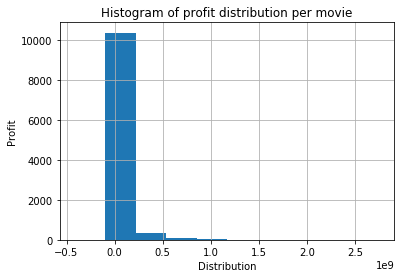

In [25]:
df['profit'].hist()
plt.xlabel('Distribution')
plt.ylabel('Profit')
plt.title('Histogram of profit distribution per movie')

In [26]:
# convert release_data to datetime formate
df['release_date']=pd.to_datetime(df['release_date'])
# confirm changes
print(df.dtypes)
df['release_date'].tail()

popularity                     float64
original_title                  object
cast                            object
director                        object
keywords                        object
runtime                        float64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
profit                         float64
dtype: object


10861   2066-06-15
10862   2066-12-21
10863   2066-01-01
10864   2066-11-02
10865   2066-11-15
Name: release_date, dtype: datetime64[ns]

In [27]:
import datetime as dt
#subtract 100 years for years that's before 2015
d_100 = []
years = 100
days_per_year = 365.24
for d in df['release_date']:
    if d.year >=2016:
        #shifting 100 years back
        tdelta = dt.timedelta(days = (years * days_per_year))
        # corrected date
        d-=tdelta
        d_100.append(d)
    else:
        #as it is
        d_100.append(d)

In [28]:
df['release_date'] = d_100
df['release_date'].tail()

10861   1966-06-16
10862   1966-12-22
10863   1966-01-02
10864   1966-11-03
10865   1966-11-16
Name: release_date, dtype: datetime64[ns]

Text(0.5, 1.0, 'Distribution of average vote per movie')

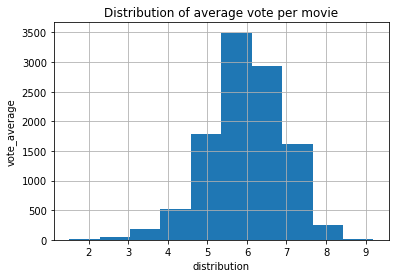

In [30]:
#change df['budget_adj'].hist()
df['vote_average'].hist()
plt.ylabel('vote_average')
plt.xlabel('distribution')
plt.title('Distribution of average vote per movie')

In [31]:
#create a matrix with only numeric features
numdf=df.loc[:,('popularity', 'runtime', 'vote_count','vote_average'
 ,'release_year', 'budget_adj' ,'revenue_adj','profit')]
numdf.head()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.985763,124.0,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,28.419936,120.0,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,13.112507,119.0,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,11.173104,136.0,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,9.335014,137.0,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09


In [32]:
# #create a vote_average band
#bandset=df
#for item in df:
#    bandset.loc[ df['vote_average'] <= 4, 'voteband'] = 1
#    bandset.loc[(df['vote_average'] > 4) & (df['vote_average'] <= 5), 'voteband'] = 2
#    bandset.loc[(df['vote_average'] > 5) & (df['vote_average'] <= 6), 'voteband']   = 3
#    bandset.loc[(df['vote_average'] > 6) & (df['vote_average'] <= 7), 'voteband']   = 4
#    bandset.loc[ df['vote_average'] > 7, 'voteband'] = 5
##    bandset['vote_average'] = bandset['voteband'].astype(int)
#df.head()

In [34]:
# Exploratory Data Analysis

# Exploratory Data Analysis
Q1a. Which factor is most correlated with profit? Which factor is most correlated with revenue?
Q1b. Which fator is most correlated with revenue?
Q2 : What kind of features are associated with movies that have high profit?
Q3 : Does the correlation matrix varies between high profit movies and all movies?
Q4. Casts in the highest profit movies
Q5. Director for most profitable movies
Q6. Gener of most profitable movies
Q7. Profitable movie genre by year
Q8a. which year make the most movie
Q8b. Which year that makes the highest profit ? revenue?
Q9. Which month make the best profit


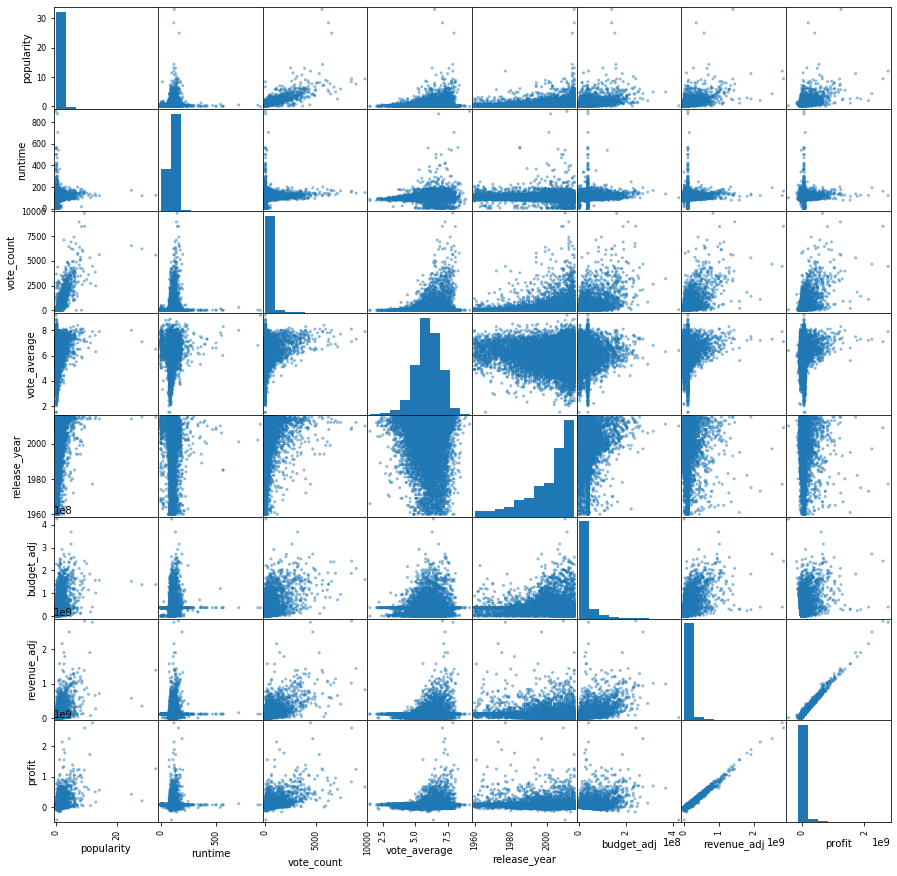

In [33]:
# correlation matrix
pd.plotting.scatter_matrix(df,figsize=(15,15));

The correlation matrix plot gives an general idea about the correlation between any two numeric factors in the list. This serves as the basis for some later analysis (and also for cross validation later). For example, there exist a positive correlation between the vote count and popularity are correlation, as well as between budge and revenue.

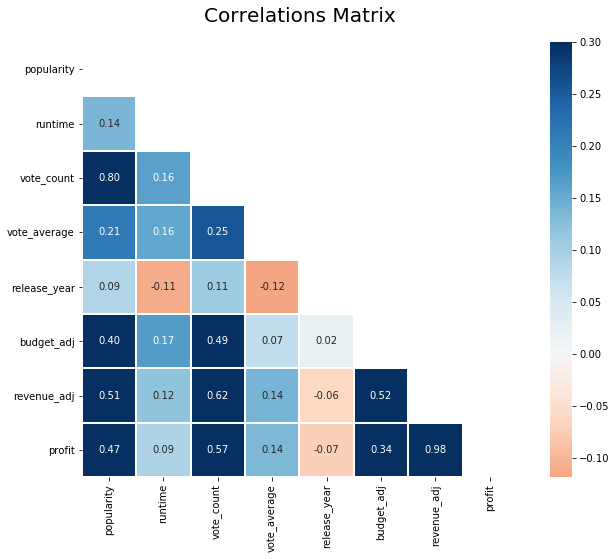

In [38]:
#correlation matrix in seaborn
# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as pltS
from matplotlib import style
corr=numdf.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize = (12,8))
sns.heatmap(corr, 
            annot=True,
            mask = mask,
            cmap = 'RdBu',
            linewidths=.9, 
            linecolor='white',
            vmax = 0.3,
            fmt='.2f',
            center = 0,
            square=True)
plt.title("Correlations Matrix", y = 1,fontsize = 20, pad = 20);

This is using a different method to cross check with the methods above for correlation. The two methods generation the same correlation results.

In [39]:
# Q1a. Which fator is most correlated with profit? Which fator is most correlated with revenue?
pd.DataFrame(numdf.corr()['profit'].sort_values(ascending = False))



,profit
profit,1.000000
revenue_adj,0.978771
vote_count,0.570307
popularity,0.466480
budget_adj,0.338898
vote_average,0.135249
runtime,0.093239
release_year,-0.071922


Revenue is mostly correlated with profit, also, vote count and popularity is also correlated

In [42]:
# Q1b. Which fator is most correlated with revenue?
pd.DataFrame(abs(numdf.corr()['revenue_adj']).sort_values(ascending = False))



,revenue_adj
revenue_adj,1.000000
profit,0.978771
vote_count,0.623803
budget_adj,0.524532
popularity,0.509053
vote_average,0.138392
runtime,0.120638
release_year,0.060000


Profit is mostly correlated with revenue, also, vote count and popularity is also correlated, Budget comes in to play an important role too

In [43]:
# Q2 : What kind of features are associated with movies that have high profit?
# create new dataframe by filter to movies that made profit of more than 100Million dollars 
high_profit_movie = df.nlargest(100,['profit'])
print(high_profit_movie.head(5))


       popularity original_title  \
1329    12.037933      Star Wars   
1386     9.432768         Avatar   
5231     4.355219        Titanic   
10594    2.010733   The Exorcist   
9806     2.563191           Jaws   

                                                    cast          director  \
1329   Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...      George Lucas   
1386   Sam Worthington|Zoe Saldana|Sigourney Weaver|S...     James Cameron   
5231   Kate Winslet|Leonardo DiCaprio|Frances Fisher|...     James Cameron   
10594  Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...  William Friedkin   
9806   Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...  Steven Spielberg   

                                                keywords  runtime  \
1329         android|galaxy|hermit|death star|lightsaber    121.0   
1386   culture clash|future|space war|space colony|so...    162.0   
5231                shipwreck|iceberg|ship|panic|titanic    194.0   
10594  exorcism|holy water|religion an

In [59]:
print(high_profit_movie.describe())

       popularity    runtime   vote_count  vote_average  release_year  \
count  100.000000  100.00000   100.000000    100.000000    100.000000   
mean     4.270364  130.50000  2754.470000      6.994000   1996.210000   
std      3.882417   26.66231  2084.281105      0.610484     15.782803   
min      0.142486   78.00000    56.000000      5.600000   1961.000000   
25%      1.983621  113.00000  1183.500000      6.500000   1984.750000   
50%      3.491783  129.50000  2587.500000      7.000000   2002.000000   
75%      5.630519  145.25000  3585.500000      7.400000   2009.250000   
max     32.985763  201.00000  9767.000000      8.300000   2015.000000   

         budget_adj   revenue_adj        profit  
count  1.000000e+02  1.000000e+02  1.000000e+02  
mean   1.160304e+08  1.060226e+09  9.441954e+08  
std    7.663567e+07  4.102334e+08  4.057958e+08  
min    9.947032e+06  6.529302e+08  6.244116e+08  
25%    4.292098e+07  7.952830e+08  6.766899e+08  
50%    1.078447e+08  9.517912e+08  8.24187

Here we generates a list with the top 100 most profitable movies. Compare to the whole dataset, this high profit movie dataset shows higher popularity and vote count. This list will be used for later analysis.

In [44]:
# details of highest profit movie
highest = high_profit_movie['profit'].idxmax()
highest_details = pd.DataFrame(high_profit_movie.loc[highest])
highest_details

,1329
popularity,12.0379
original_title,Star Wars
cast,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...
director,George Lucas
keywords,android|galaxy|hermit|death star|lightsaber
runtime,121
genres,Adventure|Action|Science Fiction
production_companies,Lucasfilm|Twentieth Century Fox Film Corporation
release_date,1977-03-20 00:00:00
vote_count,4428


Star Wars release in 1977 is still the highest profitable movies till 2015.

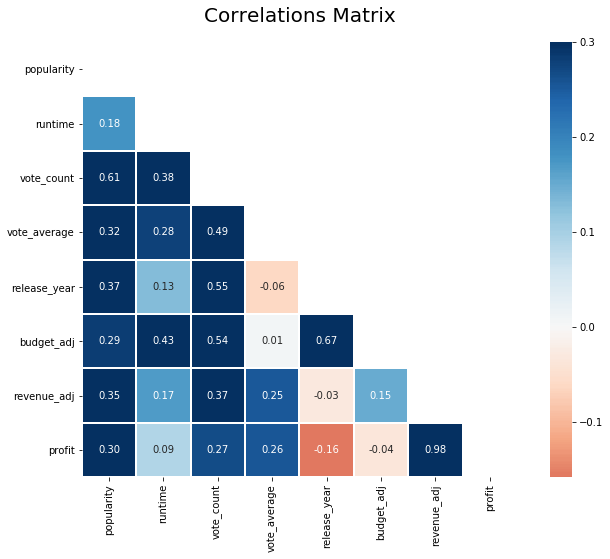

In [61]:
# Q3 : Does the correlation matrix varies between high profit movies and all movies?
corr = high_profit_movie.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize = (12,8))
sns.heatmap(corr, 
            annot=True,
            mask = mask,
            cmap = 'RdBu',
            linewidths=.9, 
            linecolor='white',
            vmax = 0.3,
            fmt='.2f',
            center = 0,
            square=True)
plt.title("Correlations Matrix", y = 1,fontsize = 20, pad = 20);

The correlation heatmap (for high profit movie) looks slight differntly than the previous one (for the whole group). For example, vote count and the release year shows a much stronger correlation. Also, budget matters much less for high profit movies

In [51]:
pd.DataFrame(high_profit_movie.corr()['profit'].sort_values(ascending = False))


,profit
profit,1.000000
revenue_adj,0.982419
popularity,0.300731
vote_count,0.267203
vote_average,0.255436
runtime,0.089920
budget_adj,-0.036204
release_year,-0.158399


Zoom in on profit only, budget matters much less for high profit movies. Vote count and vote average become a little more important. Revenue remains the top factor.

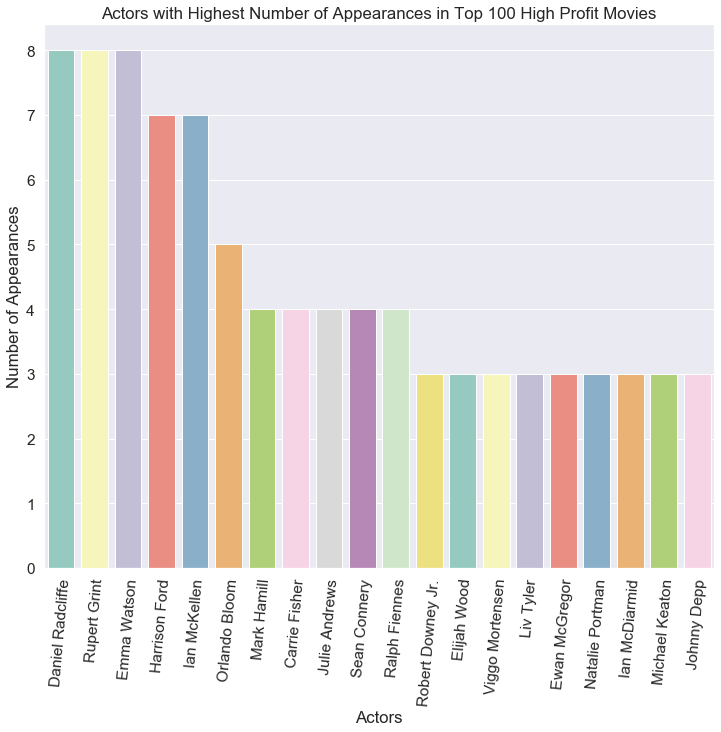

In [52]:
# Q4. Casts in the highest profit movies

#Creating a dict for the cast, and how many times each actor casted for movies
import operator

actor_dict = {}

actors = high_profit_movie["cast"]
actors = actors.str.split("|")
actors = np.array(actors)
for cast in actors:
    #check if there is a problematic list which is just a float
    for actor in cast:
        actor = actor.lstrip() #trim the whitespaces
        if actor not in actor_dict:
            actor_dict[actor] = 1
        else:
            actor_dict[actor] += 1
                

sorted_actor_dict = sorted(actor_dict.items(), key = operator.itemgetter(1), reverse = True)
#sorted_actor_dict[0:10]


x_axis = list()
y_axis = list()

for item in sorted_actor_dict[0:20]:
    x_axis.append(item[0])
    y_axis.append(item[1])


sns.set(rc={'figure.figsize':(12,10)}, font_scale=1.4)
ax = sns.barplot(x_axis, y_axis, palette="Set3")


#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(85)
    

ax.set(xlabel='Actors', ylabel='Number of Appearances', title = 'Actors with Highest Number of Appearances in Top 100 High Profit Movies')
plt.show()


Among the 100 most profitable movies, actors with the most appearances are Daniel Radcliffe, Ruper Grint, and Emma Watson (All from the Harry Potter series). Then it's Harrison Ford and Ian Makellen. Emma Watson is the only female in the top 5.

In [53]:
# Q5. Director for most profitable movies
directors = high_profit_movie.groupby("director")['profit'].count().sort_values(ascending=False)
print(directors)

director
Steven Spielberg            7
Peter Jackson               6
David Yates                 4
George Lucas                4
Chris Columbus              4
                           ..
Lewis Gilbert               1
Lee Unkrich                 1
Kyle Balda|Pierre Coffin    1
William Friedkin            1
Alfonso CuarÃ³n             1
Name: profit, Length: 67, dtype: int64


Steven Spielberg was the director with the most profitable movies, he lead the list by 7! Followed by Peter Jackson, who directed 6 high profit movies. 

1329              [Adventure, Action, Science Fiction]
1386     [Action, Adventure, Fantasy, Science Fiction]
5231                        [Drama, Romance, Thriller]
10594                        [Drama, Horror, Thriller]
9806                     [Horror, Thriller, Adventure]
Name: genres, dtype: object


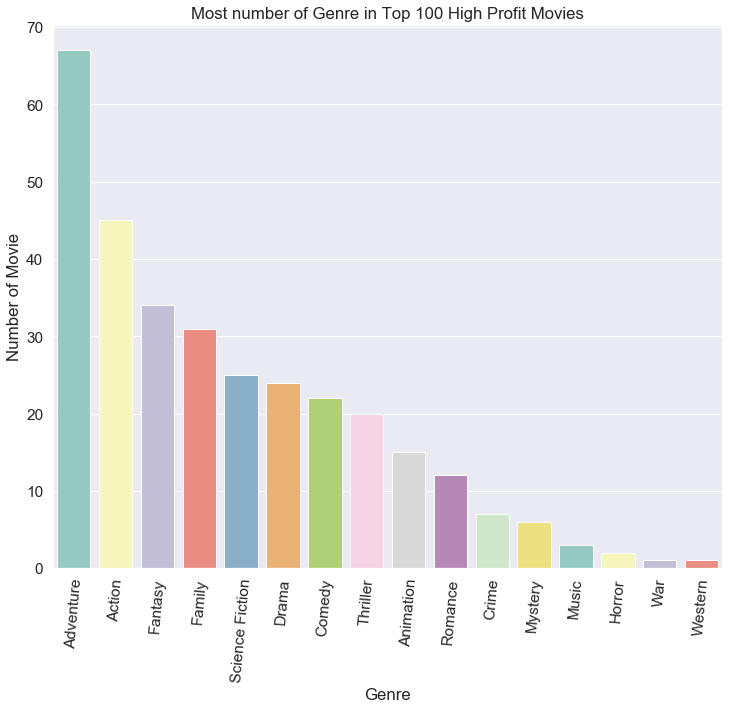

In [55]:
# Q6. Gener of most profitable movies
genre_dict = {}
genre = high_profit_movie["genres"]
genre = genre.str.split("|")
print(genre.head())

genre = np.array(genre)
for category in genre:
    #check if there is a problematic list which is just a float
    if category == '\n' or category == '0':
                print("removed value")

    for one in category:
        one = one.lstrip() #trim the whitespaces
        if one not in genre_dict:
            genre_dict[one] = 1
        else:
            genre_dict[one] += 1
                
sorted_genre_dict = sorted(genre_dict.items(), key = operator.itemgetter(1), reverse = True)
#sorted_actor_dict[0:10]


x_axis = list()
y_axis = list()

for item in sorted_genre_dict[0:20]:
    x_axis.append(item[0])
    y_axis.append(item[1])


sns.set(rc={'figure.figsize':(12,10)}, font_scale=1.4)
ax = sns.barplot(x_axis, y_axis, palette="Set3")


#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(85)
    

ax.set(xlabel='Genre', ylabel='Number of Movie', title = 'Most number of Genre in Top 100 High Profit Movies')
plt.show()

The largest genre in the top 100 profitable movies were adventure, followed by action movies. Fantasy and family are top 3 and 4. Horror, war and western are the last 3.

10110    1961
9881     1964
10690    1965
10398    1967
10654    1970
Name: release_year, dtype: int64


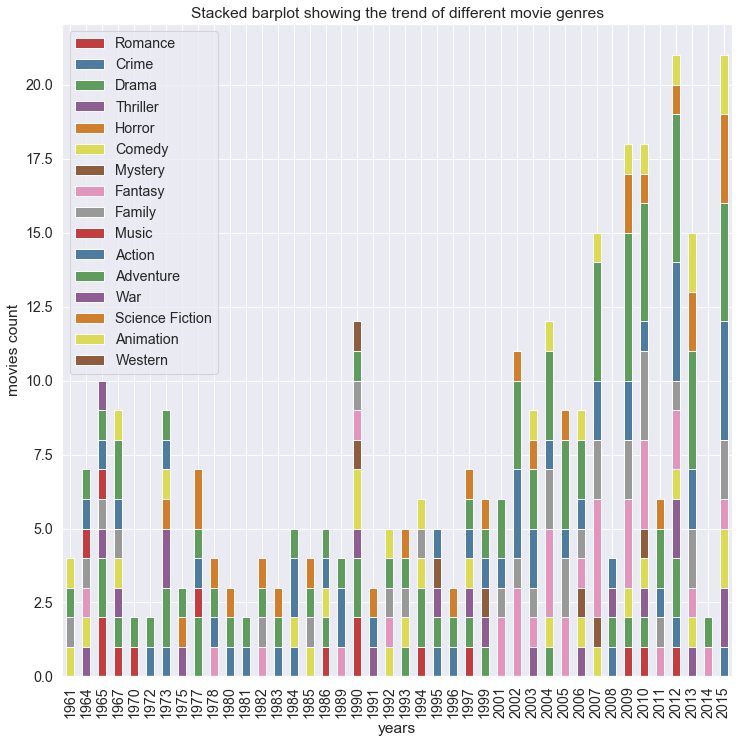

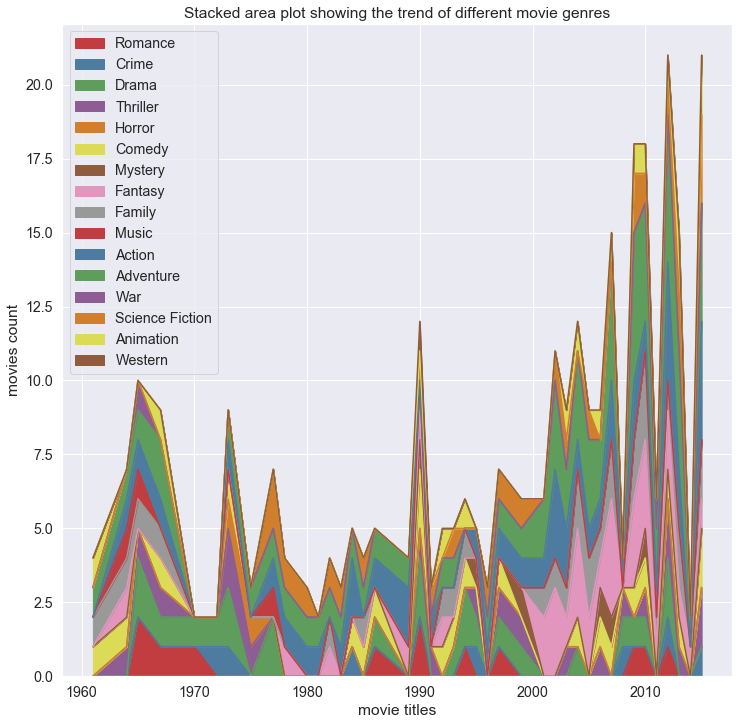

In [56]:
# Q7. Profitable movie genre by year 

years = high_profit_movie['release_year']
years = years.drop_duplicates().sort_values(ascending=True)
print(years.head())


genre_set=set()

genres = high_profit_movie["genres"]
for elem in genres:
    genres_row = elem.split("|")
    for genre in genres_row:
        if genre not in genre_set:
            genre_set.add(genre)

gerne_count_per_year_df = pd.DataFrame(index = years, columns=genre_set)


gerne_count_per_year_df[:] = 0  
for year in years:
    gen_dict={}
    gen_in_year = high_profit_movie[high_profit_movie.release_year == year]["genres"]
    gen_in_year = gen_in_year.values
    for gen in gen_in_year:
        genres_row = gen.split("|")
        for genre in genres_row:
            if genre not in gen_dict:
                gen_dict[genre]=1
                pass
            else:
                gen_dict[genre]+=1
                pass
            pass
        pass
    aux_df = pd.DataFrame(gen_dict, index = [year])
    gerne_count_per_year_df.loc[year, aux_df.columns] = gerne_count_per_year_df.loc[year, aux_df.columns] + aux_df.loc[year]
    pass
pass
sns.set(rc={'figure.figsize':(12,12)}, font_scale=1.3)
sns.set_palette("Set1", 20, .65)


ax = gerne_count_per_year_df.plot.bar(stacked=True);
ax.set(xlabel='years', ylabel='movies count', title = 'Stacked barplot showing the trend of different movie genres')
plt.show()


ax = gerne_count_per_year_df.plot.area(stacked=True);
ax.set(xlabel='movie titles', ylabel='movies count', title = 'Stacked area plot showing the trend of different movie genres')
plt.show()
                    

However, the profitable movie genre varied from year to year. For example, fantasy was very profitable in 2007, but not much so before 1996. Also, after year 2000, there were not much misicals and romance.s 

### Conclusion for the above section:
The profit of the movie was mostly correlated with the revenue, followed by vote count, popularity and budget. However, for the top 100 high profit movies, popularity outweighed vote count, and budget did not matter in the slightest. For the 100 most profitable movies, actors with the most appearances are Daniel Radcliffe, Ruper Grint and Emma Watson (All from Harry Potter series). Steven Spielberg is the director with most profitable movies, followed by Peter Jackson. The largest genre in top 100 profitable movies are adventure and action movies. However, profitable movie genre varies year by year. For example, fantasy is very profitable in 2007, but not much so before 1996.


In [60]:
# Q8a. which year make the most movie
movie_number = df.groupby("release_year")['profit'].count().sort_values(ascending=False)
print(movie_number.head())
#movie_number.nlargers


release_year
2014    699
2013    658
2015    628
2012    586
2011    540
Name: profit, dtype: int64


Year 2014 produced the highest number of movies, profits was high through 2011-2015.

In [61]:
# Q8b. Which year that makes the highest profit ? revenue?
profit_year = numdf.groupby("release_year")['profit'].sum()
revenue_year=numdf.groupby('release_year')['revenue_adj'].sum().sort_values(ascending = False)
print(profit_year.sort_values(ascending = False).head())
print(revenue_year.head())


release_year
2014    5.224206e+10
2015    4.963157e+10
2013    4.785112e+10
2012    4.524409e+10
2009    4.153946e+10
Name: profit, dtype: float64
release_year
2014    7.662372e+10
2015    7.204301e+10
2013    7.077519e+10
2012    6.601603e+10
2009    6.064233e+10
Name: revenue_adj, dtype: float64


Year 2014 was also the most profitable movie year.

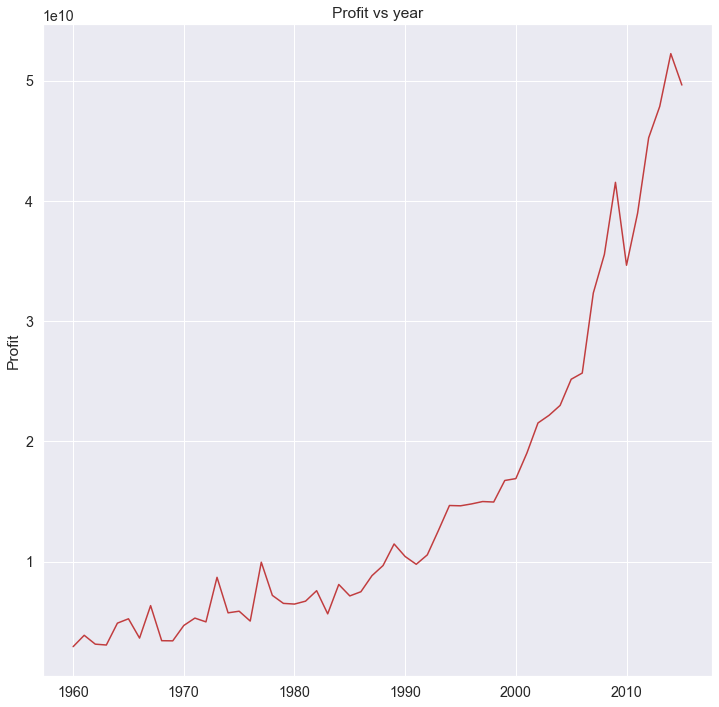

In [62]:
import matplotlib.pyplot as plt
plt.plot(profit_year)
plt.title('Profit vs year')
plt.ylabel('Profit');
plt.show()

The movie industry showed a general increasing trend from 1960 to 2015, with a small dip around year 2009-2010. 

In [65]:
# Q9. Which month make the best profit
df['month'] = df['release_date'].apply(lambda x: x.month)
profit_month = df.groupby('month')['profit'].sum().sort_values(ascending=False)
print(profit_month)


month
12    9.901650e+10
6     9.107452e+10
10    7.885997e+10
5     7.846428e+10
11    7.628002e+10
7     7.362709e+10
9     7.286903e+10
3     6.286207e+10
1     6.025523e+10
8     5.751656e+10
4     5.595776e+10
2     4.220699e+10
Name: profit, dtype: float64


December and June are the most profitable month. Febuary are the least profitable.

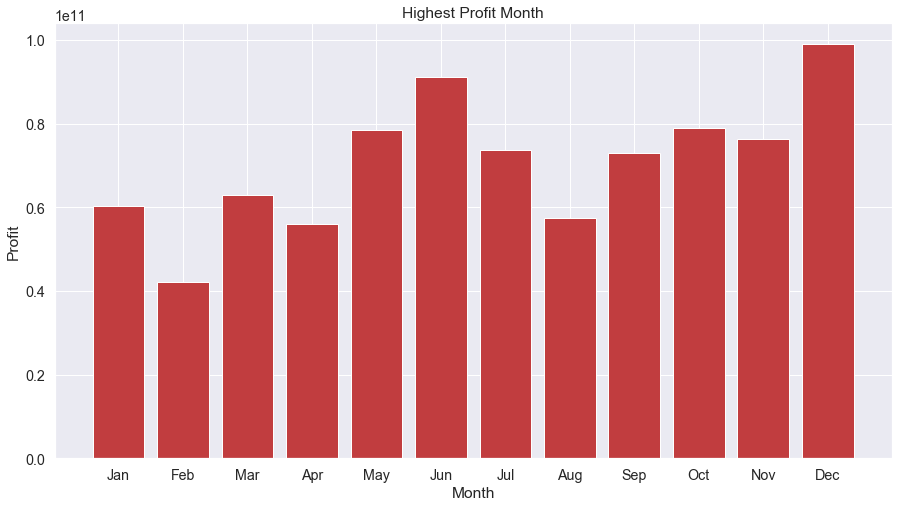

In [66]:
# Figure size
profit_month = df.groupby('month')['profit'].sum()
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')

month_name = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12], profit_month, tick_label = month_name)
# Title
plt.title('Highest Profit Month')
# y-axis
plt.ylabel('Profit')
# x-axis
plt.xlabel('Month');

There were a small peak of profit from May to July and a peak at December. August is the month the low profit at the later part of the year.  

## Conclusion
 This dataset is very rich in information. Some limitations the dataset contains are null and zero values in some features. Although I filled the zero with means value for numerical values, the fact that there were around 5000-6000 missing/values will affect the accuracy of some conclusion, for example, the correlation between profit and revenue, etc. Hence we focused on the top 100 profitable data, which is less likely to be affected by the missing values. 
 The profit of the movie was mostly correlated with the revenue, followed by vote count, popularity, and budget. However, for the top 100 high-profit movies, popularity outweighed vote count, and the budget did not matter in the slightest. Among the 100 most profitable movies, actors with the most appearances are Daniel Radcliffe, Ruper Grint, and Emma Watson (All from the Harry Potter series). Steven Spielberg was the director with the most profitable movies, followed by Peter Jackson. The largest genre in the top 100 profitable movies were adventure and action movies. However, the profitable movie genre varied from year to year. For example, fantasy was very profitable in 2007, but not much so before 1996.

 Year 2014 produced the highest number of movies, it was also the most profitable movie year. The movie industry showed a general increasing trend from 1960 to 2015, with a small dip around year 2009-2010. For each year, December and June were the most profitable month with the highest number of movie releases. February was the month with the lowest profit and the lowest number of movie releases.